In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Data Exploration

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,A,B,C,D,E,F,G,H,Target
count,500.000000,500.000000,500.000000,360.000000,253.000000,492.000000,500.000000,500.000000,500.000000
mean,3.876000,121.470000,68.666000,26.308333,106.332016,29.932724,0.472286,33.270000,0.324000
std,3.394653,32.738735,20.288067,13.120056,122.448436,10.624439,0.341394,11.890663,0.468469
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.100000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,18.000000,21.000000,25.375000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,27.000000,67.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,35.000000,145.000000,36.025000,0.612250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,72.000000,1.000000


In [4]:
train.head()

,A,B,C,D,E,F,G,H,Target
0,5,122,86,NaN,NaN,34.7,0.290,33,0
1,2,175,88,NaN,NaN,22.9,0.326,22,0
2,4,129,86,2.0,27.0,35.1,0.231,23,0
3,12,92,62,7.0,258.0,27.6,0.926,44,1
4,3,102,44,2.0,94.0,3.8,0.400,26,0


## Attributes

A: Number of pregnancies

B: Concentration of plasma glucose in a 2-hour oral glucose tolerance test

C: Diastolic blood pressure - Measured in mmHg

D: Triceps skin fold thickness - Measured in mm

E: Insulin concentration in the serum in 2 hours. Measured in (mu U/ml)

F: Weight in kg/height in (m^2)

G: Function that assigns the probability of someone getting diabetes

H: Age

Target: Value of 0 or 1 corresponds to no diabetes and diabetes

In [5]:
#checking for missing values in all the columns in train and test data
print(train.isnull().sum())
test.isnull().sum()
# almost 50% of data is missing in column E in both train and test data.


A           0
B           0
C           0
D         140
E         247
F           8
G           0
H           0
Target      0
dtype: int64


A      0
B      0
C      0
D     87
E    127
F      3
G      0
H      0
dtype: int64

In [6]:
print(train.head())#500 rows × 9 columns
print(test.head())#268*8

    A    B   C    D      E     F      G   H  Target
0   5  122  86  NaN    NaN  34.7  0.290  33       0
1   2  175  88  NaN    NaN  22.9  0.326  22       0
2   4  129  86  2.0   27.0  35.1  0.231  23       0
3  12   92  62  7.0  258.0  27.6  0.926  44       1
4   3  102  44  2.0   94.0   3.8  0.400  26       0
   A    B   C     D      E     F      G   H
0  6  148  72  35.0    NaN  33.6  0.627  50
1  1   85  66  29.0    NaN  26.6  0.351  31
2  5  116  74   NaN    NaN  25.6  0.201  30
3  4  110  92   NaN    NaN  37.6  0.191  30
4  5  166  72  19.0  175.0  25.8  0.587  51


In [7]:
train_a = train
test_a = test
train_a

,A,B,C,D,E,F,G,H,Target
0,5,122,86,NaN,NaN,34.7,0.290,33,0
1,2,175,88,NaN,NaN,22.9,0.326,22,0
2,4,129,86,2.0,27.0,35.1,0.231,23,0
3,12,92,62,7.0,258.0,27.6,0.926,44,1
4,3,102,44,2.0,94.0,3.8,0.400,26,0
...,...,...,...,...,...,...,...,...,...
495,1,97,64,19.0,82.0,18.2,0.299,21,0
496,1,136,74,5.0,24.0,37.4,0.399,24,0
497,8,95,72,NaN,NaN,36.8,0.485,57,0
498,4,90,0,NaN,NaN,28.0,0.610,31,0


## Data Preprocessing

In [8]:
#data imputation of training data set
# replacing the missing data in column D with mean- as the data is uniform
# replacing the missing data in column D with median- as the data is scewed

train_a["D"] = train['D'].transform(lambda x: x.fillna(x.mean()))
train_a['F'] = train['F'].transform(lambda x: x.fillna(x.median()))

#data imputation of testing data set

test_a["D"] = test['D'].transform(lambda x: x.fillna(x.mean()))
test_a["F"] = test['F'].transform(lambda x: x.fillna(x.median()))

In [9]:
#removing column E from both train and test sets
test_a = test_a.drop(['E'],axis = 1)
train_a = train_a.drop(['E'], axis = 1)

In [10]:
train_a.describe()
test_a.describe()

,A,B,C,D,F,G,H
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,3.787313,119.820896,69.925373,25.016575,29.761940,0.471112,33.186567
std,3.327829,30.522872,17.491197,10.387790,10.759435,0.312305,11.534782
min,0.000000,0.000000,0.000000,1.000000,2.000000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,23.000000,25.575000,0.251250,24.000000
50%,3.000000,119.000000,72.000000,25.016575,31.600000,0.361500,29.500000
75%,6.000000,137.250000,78.000000,31.000000,36.025000,0.643500,39.250000
max,15.000000,196.000000,110.000000,52.000000,67.100000,1.893000,81.000000


In [11]:
#verifying for the missing values after cleaning the dataset 
train_a.isnull().sum()
test_a.isnull().sum()

A    0
B    0
C    0
D    0
F    0
G    0
H    0
dtype: int64

In [12]:
train_a.groupby('Target').size()

Target
0    338
1    162
dtype: int64

Target
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

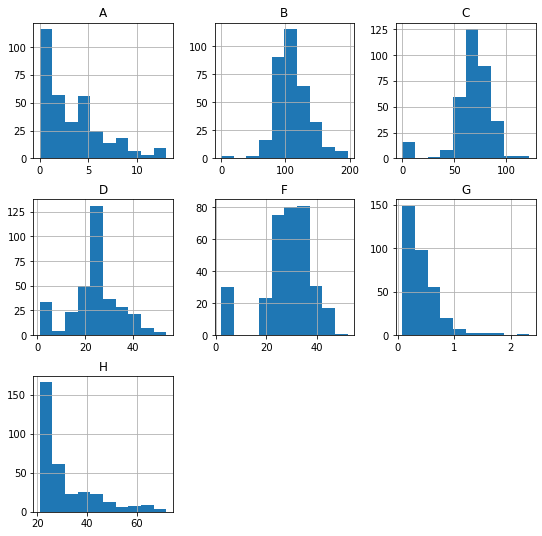

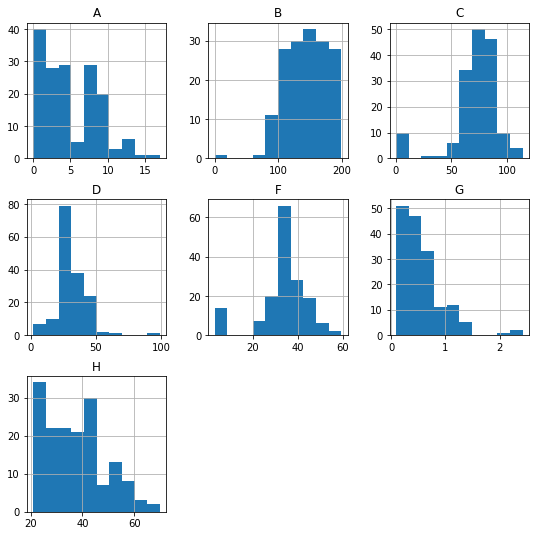

In [13]:
train_a.groupby(train_a['Target']).hist(figsize=(9, 9))

Target
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

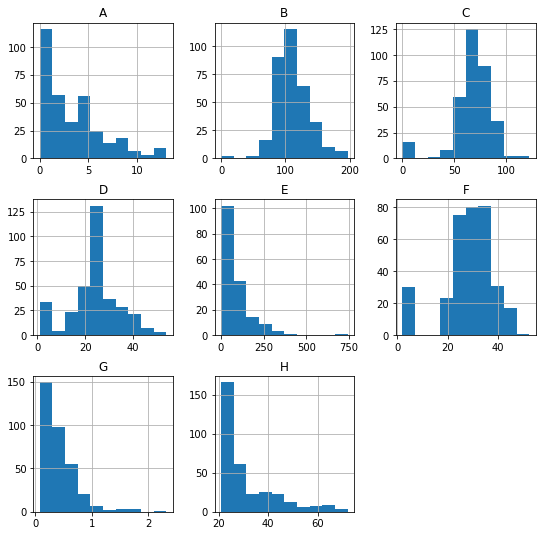

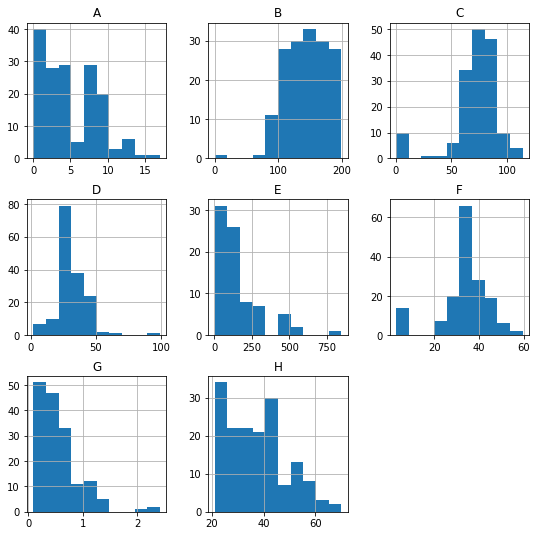

In [14]:
train.groupby(train['Target']).hist(figsize=(9, 9))

In [15]:
print("Total : ", train_a[train_a.C == 0].shape[0])

Total :  26


In [16]:
print(train_a[train_a.C == 0].groupby('Target')['H'].count())

Target
0    16
1    10
Name: H, dtype: int64


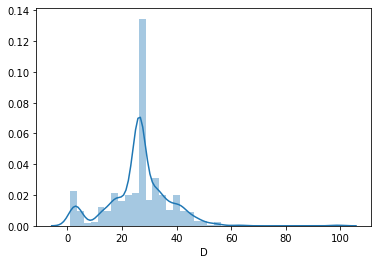

In [17]:
sns.distplot(train['D'])

In [18]:
# Function that assigns the probability of someone getting diabetes should lie between 0 and 1
# So all the outlier greater than 1 are made equal to 1
def out(x):
    if x > 1:
        return 1
    else:
        return x
train_a['G'] = train_a['G'].apply(lambda x: out(x) )
test_a['G'] = test_a['G'].apply(lambda x: out(x) )


In [19]:
train_a.describe()

,A,B,C,D,F,G,H,Target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.876000,121.470000,68.666000,26.308333,29.965800,0.445082,33.270000,0.324000
std,3.394653,32.738735,20.288067,11.128398,10.542127,0.258239,11.890663,0.468469
min,0.000000,0.000000,0.000000,1.000000,2.100000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,22.000000,25.550000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,26.308333,32.000000,0.378000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,32.000000,35.900000,0.612250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,59.400000,1.000000,72.000000,1.000000


## Outlier Detection and trimming

In [20]:

q = train_a['B'].quantile(0.0001)
train_a = train_a[train_a['B']>q]

w = train_a['C'].quantile(0.0001)
train_a = train_a[train_a['C']>w]

t = train_a['F'].quantile(0.0001)
train_a = train_a[train_a['F']>t]


In [21]:
qt = test_a['B'].quantile(0.0001)
test_a = test_a[test_a['B']>qt]

wt = test_a['C'].quantile(0.0001)
test_a = test_a[test_a['C']>wt]

tt = test_a['F'].quantile(0.0001)
test_a = test_a[test_a['F']>tt]


In [22]:
train_a.describe()


,A,B,C,D,F,G,H,Target
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.893617,122.585106,72.525532,26.395248,30.026596,0.448455,33.453191,0.321277
std,3.399699,31.620015,12.673293,11.327609,10.616592,0.258433,11.968551,0.467464
min,0.000000,57.000000,30.000000,1.000000,2.400000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,25.600000,0.245000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,26.308333,32.000000,0.382000,29.000000,0.000000
75%,6.000000,143.750000,82.000000,32.000000,36.075000,0.612750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,59.400000,1.000000,70.000000,1.000000


In [23]:
test_a.describe()

,A,B,C,D,F,G,H
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,3.828125,120.843750,72.335938,25.090988,29.828906,0.458742,33.371094
std,3.304446,28.809567,11.893500,10.520177,10.409375,0.266281,11.658498
min,0.000000,44.000000,24.000000,1.000000,2.400000,0.084000,21.000000
25%,1.000000,101.750000,64.000000,22.750000,25.600000,0.252000,24.000000
50%,3.000000,119.000000,74.000000,25.016575,31.600000,0.368000,30.000000
75%,6.000000,139.000000,80.000000,31.000000,35.900000,0.655500,40.000000
max,15.000000,196.000000,110.000000,52.000000,67.100000,1.000000,81.000000


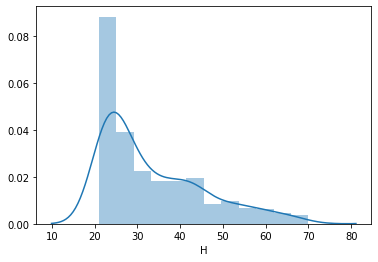

In [24]:
sns.distplot(train_a['H'])

# Model Building


## kneighbours


In [25]:
# preparing training set for x and y 
train_x = train_a[['A','B','C','D','F','G','H']]
y = train_a[['Target']]

In [26]:
#standardisation
sc = StandardScaler()
mat1 = sc.fit_transform(train_x)
mat3 = sc.fit_transform(test_a)

In [27]:
X_train_org, X_test_org, y_train, y_test = train_test_split(mat1, y, random_state = 0, test_size = 0.2)


X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.3,random_state=0)
knn=KNeighborsClassifier(15)   
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
test_predict=knn.predict(mat3)
test_predict = pd.DataFrame(test_predict,index=test_imputed.index,columns=['Survived'])
print('train_score=',train_score,'validation score=',test_score)
test_predict

In [28]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_org, y_train)
    train_score_array.append(knn.score(X_train_org, y_train))
    test_score_array.append(knn.score(X_test_org, y_test))

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A

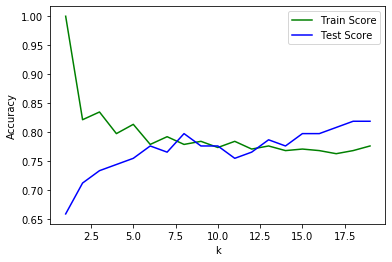

In [29]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
knn = KNeighborsClassifier(6)
knn.fit(X_train_org, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_org, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_org, y_test)))

Train score: 0.7793
Test score: 0.7766


C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [31]:


grid_parameters = {'n_neighbors' : [5, 6, 15, 16], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

gridsse = GridSearchCV(knn, grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
gridsse_fit = gridsse.fit(X_train_org, y_train)

print("KNN train score: ",gridsse.score(X_train_org, y_train))
print("KNN test score: ",gridsse.score(X_test_org, y_test))
print("Best score : ", gridsse_fit.best_score_)
print("Best estimator: ",gridsse_fit.best_estimator_)
print("Best parameters: ",gridsse_fit.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  33 out of  48 | elapsed:    5.1s remaining:    2.3s


KNN train score:  1.0
KNN test score:  0.8191489361702128
Best score :  0.7446808510638298
Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='distance')
Best parameters:  {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.7s finished
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [32]:
knn_cross =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
knn_cross.fit(X_train_org,y_train)
print('The accuracy of KNN for train data is',knn_cross.score(X_train_org,y_train))
print('The accuracy of KNN for test data is',knn_cross.score(X_test_org,y_test))

The accuracy of KNN for train data is 0.7819148936170213
The accuracy of KNN for test data is 0.8191489361702128


C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


# linear regression

In [33]:
lreg = LinearRegression()
lreg.fit(X_train_org, y_train)
print(lreg.score(X_train_org, y_train))
print(lreg.score(X_test_org, y_test))

0.3073389006639706
0.38772058904735857


Text(0.5, 0, 'BMI')

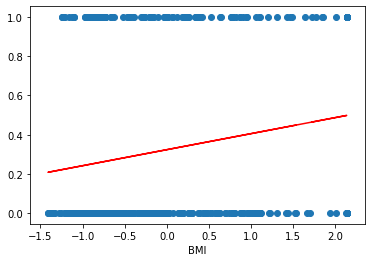

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_org[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('BMI')

##### the model is a binary classification so linear regression will not predict the results accurately

## Logistic Regression

In [35]:
y_test.sum()/len(y_test)

Target    0.329787
dtype: float64

In [36]:
# determing the hyperparameter through a user defined function
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_org, y_train)
    log_l2.fit(X_train_org, y_train)
    train_score_l1.append(log_l1.score(X_train_org, y_train))
    train_score_l2.append(log_l2.score(X_train_org, y_train))
    test_score_l1.append(log_l1.score(X_test_org, y_test))
    test_score_l2.append(log_l2.score(X_test_org, y_test))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_

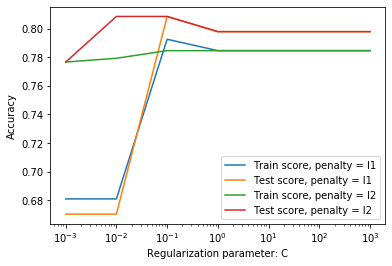

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [38]:
lr = LogisticRegression()
lr.fit(X_train_org,y_train)
train_predict=lr.predict(X_train_org)
test_predict=lr.predict(X_test_org)
print('Logistic Regression accuracy for train data',metrics.accuracy_score(train_predict,y_train))
print('Logistic Regression accuracy for train data',metrics.accuracy_score(test_predict,y_test))

Logistic Regression accuracy for train data 0.7845744680851063
Logistic Regression accuracy for train data 0.7978723404255319


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# refining hyperparameter using grid function
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.1,1,10,100,1000]} 

logreg_gs_fit = GridSearchCV(lr, grid_values, cv = 3, verbose = 1, n_jobs = -1)

In [40]:
gscv_fit_model = logreg_gs_fit.fit(X_train_org, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("Logistic Regression train score: ",logreg_gs_fit.score(X_train_org, y_train))
print("Logistic Regression test score: ",logreg_gs_fit.score(X_test_org, y_test))
print("Best score : ", gscv_fit_model.best_score_)
print("Best estimator: ",gscv_fit_model.best_estimator_)
print("Best parameters: ",gscv_fit_model.best_params_)

Logistic Regression train score:  0.7845744680851063
Logistic Regression test score:  0.7978723404255319
Best score :  0.7686170212765957
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best parameters:  {'C': 1, 'penalty': 'l1'}


In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
logreg =LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train_org, y_train)
logreg_scores = cross_validate(logreg,X_test_org, y_test, cv=5)
print("Logistic Regression scores: ",logreg_scores)
print("Logistic Regression train score: ", logreg.score(X_train_org, y_train))
print("Logistic Regression test score: ", logreg.score(X_test_org, y_test))

Logistic Regression scores:  {'fit_time': array([0.        , 0.00399661, 0.        , 0.00403905, 0.00201154]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.85      , 0.68421053, 0.73684211, 0.77777778, 0.61111111])}
Logistic Regression train score:  0.7845744680851063
Logistic Regression test score:  0.7978723404255319


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_

## Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [43]:
svc_obj = SVC()
param_values = {'kernel': ['rbf','linear','poly'], 'C' : [0.1, 1]}
               
kernel_svm = GridSearchCV(svc_obj, param_values, verbose = 2, cv = 3, n_jobs = -1)
kernel_svmfit = kernel_svm.fit(X_train_org, y_train)

print("kernel_svm train score: ",kernel_svm.score(X_train_org, y_train))
print("kernel_svm test score: ",kernel_svm.score(X_test_org, y_test))
print("Best score : ", kernel_svmfit.best_score_)
print("Best estimator for prediction: ",kernel_svmfit.best_estimator_)
print("Best parameters for prediction: ",kernel_svmfit.best_params_)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s


kernel_svm train score:  0.7819148936170213
kernel_svm test score:  0.7978723404255319
Best score :  0.7659574468085106
Best estimator for prediction:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best parameters for prediction:  {'C': 1, 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
svc_model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
svc_model.fit(X_train_org, y_train)
svc_model_scores = cross_validate(svc_model,X_test_org, y_test, cv=5)
print("kernel_svm model scores: ",svc_model_scores)
print("kernel_svm model train score: ", svc_model.score(X_train_org, y_train))
print("kernel_svm model test score: ", svc_model.score(X_test_org, y_test))

kernel_svm model scores:  {'fit_time': array([0.        , 0.00499773, 0.        , 0.        , 0.00499797]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.85      , 0.73684211, 0.73684211, 0.77777778, 0.66666667])}
kernel_svm model train score:  0.7898936170212766
kernel_svm model test score:  0.7978723404255319


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# Decision Tree Model

In [45]:
dt=DecisionTreeClassifier()
dt.fit(X_train_org,y_train)
dt_train_predict = dt.predict(X_train_org)
dt_test_prediction= dt.predict(X_test_org)
print('Decision Tree accuracy for train data is',metrics.accuracy_score(dt_train_predict,y_train))
print('Decision Tree accuracy for test data is',metrics.accuracy_score(dt_test_prediction,y_test))

Decision Tree accuracy for train data is 1.0
Decision Tree accuracy for test data is 0.6276595744680851


In [46]:
#tuning for hyperparameters
parameters = {'criterion':['gini','entropy'], 'max_depth': range(2,20)}
dt_gs = GridSearchCV(dt, parameters, n_jobs = -1, cv = 2)

In [47]:
dt_gs_fit = dt_gs.fit(X_train_org, y_train)

In [48]:
print("Decision tree train score after tuning hyperparameters: ",dt_gs.score(X_train_org, y_train))
print("Decision tree test score after tuning hyperparameters: ",dt_gs.score(X_test_org, y_test))
print("Best score : ", dt_gs_fit.best_score_)
print("Best estimator: ",dt_gs_fit.best_estimator_)
print("Best parameters: ",dt_gs_fit.best_params_)

Decision tree train score after tuning hyperparameters:  0.8031914893617021
Decision tree test score after tuning hyperparameters:  0.7872340425531915
Best score :  0.7393617021276596
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best parameters:  {'criterion': 'entropy', 'max_depth': 3}


In [49]:
#applying cross validation to decion tree 
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtree.fit(X_train_org, y_train)
dtree_cscores = cross_validate(dtree,X_test_org, y_test, cv=5)
print("Decision tree scores after cross validation: ",dtree_cscores)
print("Decision tree train score after cross validation: ", dtree.score(X_train_org, y_train))
print("Decision tree test score after cross validation: ", dtree.score(X_test_org, y_test))

Decision tree scores after cross validation:  {'fit_time': array([0.        , 0.00499678, 0.        , 0.        , 0.        ]), 'score_time': array([0.        , 0.        , 0.00204659, 0.        , 0.        ]), 'test_score': array([0.8       , 0.73684211, 0.73684211, 0.77777778, 0.77777778])}
Decision tree train score after cross validation:  0.8111702127659575
Decision tree test score after cross validation:  0.7659574468085106


The accuracy of KNN for train data is 0.8071065989847716
The accuracy of KNN for test data is 0.78

kernel_svm model train score:  0.8426395939086294
kernel_svm model test score:  0.76

Logistic Regression train score:  0.8375634517766497
Logistic Regression test score:  0.78

Decision tree train score after cross validation:  0.8629441624365483
Decision tree test score after cross validation:  0.68

# Based on the above models, the logistic model is best based on the accuracy 

# Prediction

In [56]:
test_predict = logreg.predict(mat3)
test_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [60]:
# merging the cleaned test data with predictions 
predict_final = pd.concat([pd.DataFrame(mat3), pd.DataFrame(test_predict)], axis=1)

In [61]:
# Renaming the column name as predictions
final_predictions = pd.DataFrame(predict_final)
names = final_predictions.columns.tolist()
names[names.index(0)] = 'Diabetes Predictions'
final_predictions.columns = names

In [62]:
# prediction of test.csv
pd.DataFrame(final_predictions).to_csv('Diabetes prediction.csv')